# First data explorations 

## This is also necessary for ascertaining some model assumptions

In this notebook we analyse the consumption and other country data a bit more in detail to see what are its systematics
We answer questions like 

1. What is the ratio between GDP per capita and consumption exp. per capita?  
2. How does this ratio change with cons. exp pc?
3. Is there a relationship between GDP per capita and carbon intensity? 

and more..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
# read the csv file data_nowcasted.extended.csv into a pandas dataframe from the data folder
data = pd.read_csv('./data/pip_all_data/data_nowcasted_extended.csv')


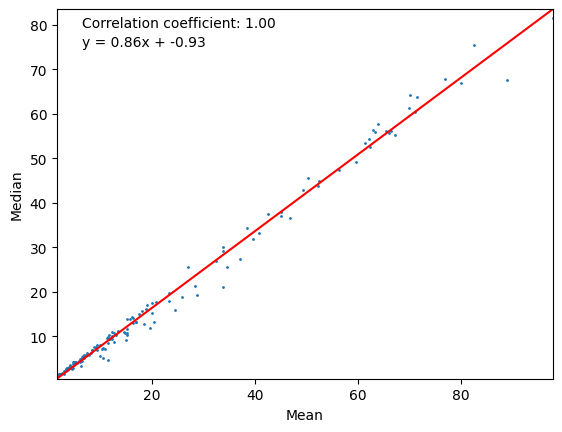

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for scatterplot and linear fit line
plt.scatter(data['mean'], data['median'], s=1)
plt.plot(np.unique(data['mean']), np.poly1d(np.polyfit(data['mean'], data['median'], 1))(np.unique(data['mean'])), color='red')
plt.xlabel('Mean')
plt.ylabel('Median')
plt.margins(0)

# Calculating correlation coefficient and linear fit equation
correlation_coef = np.corrcoef(data['mean'], data['median'])[0][1]
linear_fit_eq = np.poly1d(np.polyfit(data['mean'], data['median'], 1))

# Formatting annotations with two significant digits
formatted_correlation = f"{correlation_coef:.2f}"
formatted_linear_fit_eq = f"y = {linear_fit_eq.coefficients[0]:.2f}x + {linear_fit_eq.coefficients[1]:.2f}"

# Annotating the plot
plt.annotate(f'Correlation coefficient: {formatted_correlation}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(formatted_linear_fit_eq, xy=(0.05, 0.9), xycoords='axes fraction')

plt.show()


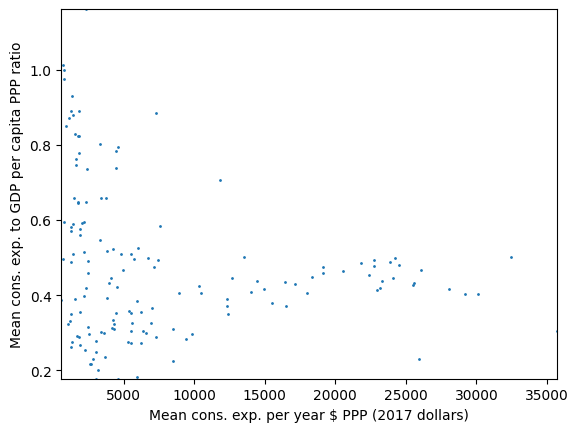

In [3]:
# calculate mean to gdp_pc_ppp ratio and plot as a scatter plot agasint the mean of the data dataframe
# calculate the mean to gdp_pc_ppp ratio
data['mean_to_gdp_pc_ppp_ratio'] = data['mean']*365/data['gdp_pc_ppp_2017']
# plot the mean_to_gdp_pc_ppp_ratio against the mean
plt.scatter(data['mean']*365, data['mean_to_gdp_pc_ppp_ratio'], s=1) # mean is multiplied by 365 to convert from mean per day to mean per year
plt.xlabel('Mean cons. exp. per year $ PPP (2017 dollars)')
plt.ylabel('Mean cons. exp. to GDP per capita PPP ratio')
plt.margins(0)
plt.show()

## Fit a model to this data which looks a potential energy function from physics e.g. Morse or lennard-jones potential
## But this is diffcult so we just fit a linear trend from 0 to 6000 and from 6000 to 3500

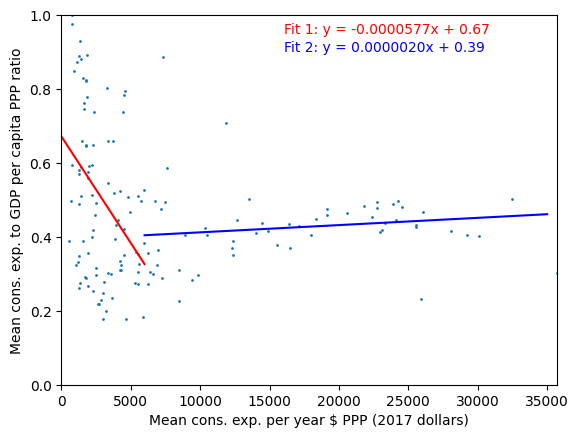

In [4]:
def linear_fit(data, x_col, y_col):
    return np.poly1d(np.polyfit(data[x_col], data[y_col], 1))

def quadratic_fit(data, x_col, y_col):
    return np.poly1d(np.polyfit(data[x_col], data[y_col], 2))

def power_law(x, a, b):
    return a * np.power(x, b)

def fit_and_plot(data, x_col, y_col):
    # Linear fits in specified ranges
    ranges = [(0, 6000), (6000, 35000)]
    linear_fits = []
    plot_colors = ['red', 'blue']  # Different color for each fit for clarity
    annotations = []

    for i, (start, end) in enumerate(ranges):
        mask = (data[x_col] >= start) & (data[x_col] <= end)
        fit = linear_fit(data[mask], x_col, y_col)
        linear_fits.append(fit)
        x_vals = np.linspace(start, end, 100)  # Use linspace for smooth line plotting
        plt.plot(x_vals, fit(x_vals), color=plot_colors[i])
        
        # Prepare annotation text for linear fit equations
        equation_text = f'Fit {i+1}: y = {fit[1]:.7f}x + {fit[0]:.2f}'
        annotations.append(equation_text)

    # Plotting annotations in the upper right corner, one above each other
    for i, text in enumerate(annotations):
        plt.annotate(text, xy=(0.45, 0.95 - i*0.05), xycoords='axes fraction', color=plot_colors[i])

    plt.scatter(data[x_col], data[y_col], s=1)
    plt.xlabel('Mean cons. exp. per year $ PPP (2017 dollars)')
    plt.ylabel('Mean cons. exp. to GDP per capita PPP ratio')
    plt.margins(0)
    plt.ylim(0, 1)
    plt.show()

# Note: Before using 'fit_and_plot', ensure 'data' DataFrame is defined and contains
# the necessary columns ('mean', 'gdp_pc_ppp_2017', etc.) as per your data structure.

# Adding a temporary column
data['temp_mean_yearly'] = data['mean']*365

# Updated example usage
data['mean_to_gdp_pc_ppp_ratio'] = data['mean']*365/data['gdp_pc_ppp_2017']
fit_and_plot(data, 'temp_mean_yearly', 'mean_to_gdp_pc_ppp_ratio')

##### the outcome of the above plotting exercise is basically that it makes, when keeping things super simple, sense to let countries have their current ratios up to mean cons.exp per year of 10000 and then fix the ratio at 0.4 or slightly above (although this is a cross country analysis and it does not necessarily tell us anything about individual country trajectories)

# Now check whether there is a relationship between GDP and carbon intensity

There is likely no cross-country relationship but that does not mean there is no relationship for each country individually over time.
Does faster economic growth lead to faster or slower or unchanged carbon intensity reduction?

Text(0, 0.5, 'Carbon intensity (kg CO2 per 2017 dollars)')

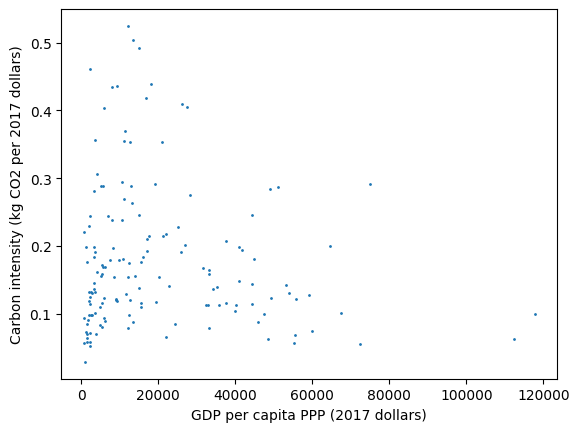

In [5]:
# plot on a scatterplot gdp_ppp_pc_2017 against carbon_intensity
plt.scatter(data['gdp_pc_ppp_2017'], data['carbon_intensity'], s=1)
plt.xlabel('GDP per capita PPP (2017 dollars)')
plt.ylabel('Carbon intensity (kg CO2 per 2017 dollars)')

## Check whether there is a relationship between economic growth and technology evolution i.e. carbon intensity reduction

     country_code  gdp_pc_ppp_change_rate  carbon_intensity_change_rate
0             ABW                0.024028                           NaN
1             ABW               -0.018394                           NaN
2             ABW                0.056370                           NaN
3             ABW               -0.022649                           NaN
4             ABW               -0.012556                           NaN
...           ...                     ...                           ...
2655          ZWE               -0.011779                     -0.136112
2656          ZWE                0.019748                     -0.100730
2657          ZWE                0.029094                      0.077781
2658          ZWE               -0.081773                     -0.017707
2659          ZWE               -0.096704                     -0.114667

[2660 rows x 3 columns]


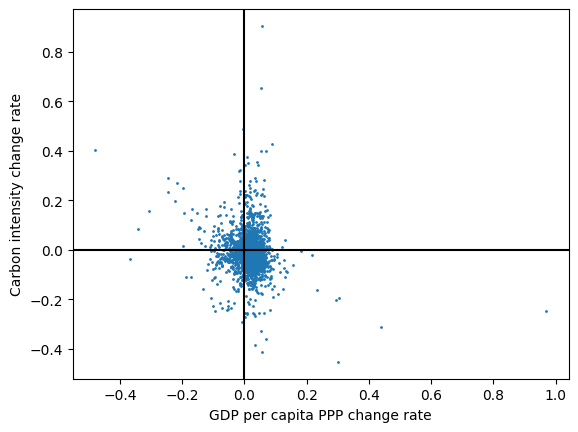

In [6]:
# import gdp_pc_ppp and carbon_intensity into numpy arrays then loop over all countries and compute for gdp per capita and carbon intensity the change rate from year to year from 2010 to 2020
# import gdp_pc_ppp and carbon_intensity from the csv data file which is not loaded yet into dataframes
# Importing the data
gdp_pc_ppp = pd.read_csv('./data/pip_all_data/gdp_pc_ppp.csv', sep=';')
carbon_intensity = pd.read_csv('./data/pip_all_data/carbon_intensity.csv')

# Assuming 'data' is another DataFrame that contains 'country_code'
# countries = data['country_code'].unique()
countries = gdp_pc_ppp['Country Code'].unique()  # Modify as per your actual DataFrame
years = list(np.arange(2010, 2021))

# Initialize an empty DataFrame for storing all change rates
all_change_rates_df = pd.DataFrame()

for country in countries:
    #print(country)
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_ci = carbon_intensity[carbon_intensity['Country Code'] == country].index[0]

    # Extracting the values for each year
    gdp_pc_ppp_values = [gdp_pc_ppp.at[country_row_gdp, str(year)] for year in years]
    carbon_intensity_values = [carbon_intensity.at[country_row_ci, str(year)] for year in years]

    # Computing the change rate
    gdp_pc_ppp_change_rate = [(gdp_pc_ppp_values[i+1] - gdp_pc_ppp_values[i]) / gdp_pc_ppp_values[i] for i in range(len(years) - 1)]
    carbon_intensity_change_rate = [(carbon_intensity_values[i+1] - carbon_intensity_values[i]) / carbon_intensity_values[i] for i in range(len(years) - 1)]

    # Creating a dictionary for the change rates
    change_rate_dict = {
        'country_code': country,
        'gdp_pc_ppp_change_rate': gdp_pc_ppp_change_rate,
        'carbon_intensity_change_rate': carbon_intensity_change_rate
    }

    # Convert the dictionary to a DataFrame
    change_rate_df = pd.DataFrame(change_rate_dict)

    # Append this DataFrame to the cumulative DataFrame
    all_change_rates_df = pd.concat([all_change_rates_df, change_rate_df], ignore_index=True)

# The final DataFrame contains all the change rates for each country
print(all_change_rates_df)


# save this dataframe as a csv file
all_change_rates_df.to_csv('./data/pip_all_data/all_change_rates.csv', index=False)

# plot on a scatterplot gdp change rate against carbon intensity change rate
plt.scatter(all_change_rates_df['gdp_pc_ppp_change_rate'], all_change_rates_df['carbon_intensity_change_rate'], s=1)
plt.xlabel('GDP per capita PPP change rate')
plt.ylabel('Carbon intensity change rate')
# add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
# add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-')

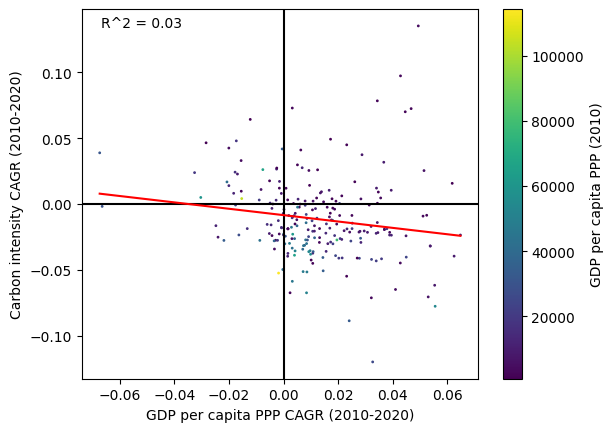

In [7]:
# Assuming 'data' is another DataFrame that contains 'country_code'
countries = gdp_pc_ppp['Country Code'].unique()  # Modify as per your actual DataFrame
years = list(np.arange(2010, 2021))

# Initialize an empty list for storing CAGR data
cagr_data = []

for country in countries:
    #print(country)
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_ci = carbon_intensity[carbon_intensity['Country Code'] == country].index[0]

    # Extracting the values for the first and last year
    gdp_start = gdp_pc_ppp.at[country_row_gdp, str(years[0])]
    gdp_end = gdp_pc_ppp.at[country_row_gdp, str(years[-1])]
    ci_start = carbon_intensity.at[country_row_ci, str(years[0])]
    ci_end = carbon_intensity.at[country_row_ci, str(years[-1])]

    # Computing CAGR
    n_years = years[-1] - years[0]
    gdp_cagr = (gdp_end / gdp_start) ** (1/n_years) - 1
    ci_cagr = (ci_end / ci_start) ** (1/n_years) - 1

    # Appending the result to the list
    cagr_data.append({
        'country_code': country, 
        'gdp_pc_ppp_cagr': gdp_cagr, 
        'carbon_intensity_cagr': ci_cagr
    })

# Convert the list of dictionaries to a DataFrame
cagr_df = pd.DataFrame(cagr_data)

# Add GDP per capita PPP for 2010 to cagr_data
for item in cagr_data:
    country_code = item['country_code']
    country_row = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country_code].index[0]
    item['gdp_pc_ppp_2010'] = gdp_pc_ppp.at[country_row, '2010']  # Assuming '2010' is the column name

# Update cagr_df with the new data
cagr_df = pd.DataFrame(cagr_data)


# Save the CAGR DataFrame as a CSV file
cagr_df.to_csv('./data/pip_all_data/cagr.csv', index=False)

# Remove any rows with NaN or infinite values
cleaned_cagr_df = cagr_df.dropna().replace([np.inf, -np.inf], np.nan).dropna()

## Create a colormap for the scatter plot
norm = plt.Normalize(cleaned_cagr_df['gdp_pc_ppp_2010'].min(), cleaned_cagr_df['gdp_pc_ppp_2010'].max())
colors = cm.viridis(norm(cleaned_cagr_df['gdp_pc_ppp_2010']))

# Check if there are enough unique values to perform linear regression
if len(np.unique(cleaned_cagr_df['gdp_pc_ppp_cagr'])) > 1 and len(np.unique(cleaned_cagr_df['carbon_intensity_cagr'])) > 1:
    # Fit the linear model
    coefficients = np.polyfit(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'], 1)
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(cleaned_cagr_df['gdp_pc_ppp_cagr'].min(), cleaned_cagr_df['gdp_pc_ppp_cagr'].max(), 100)
    y_axis = polynomial(x_axis)

    # Plotting the CAGR values
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.scatter(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'], color=colors, s=1)
    ax.set_xlabel('GDP per capita PPP CAGR (2010-2020)')
    ax.set_ylabel('Carbon intensity CAGR (2010-2020)')
    ax.axhline(y=0, color='black', linestyle='-')
    ax.axvline(x=0, color='black', linestyle='-')
    # Add a linear fit line
    ax.plot(x_axis, y_axis, color='red')
    # Color countries based on their absolute GDP per capita PPP in 2010
    # Adding a colorbar for reference
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax, label='GDP per capita PPP (2010)')
    # plot the R^2 value
    r_squared = np.corrcoef(cleaned_cagr_df['gdp_pc_ppp_cagr'], cleaned_cagr_df['carbon_intensity_cagr'])[0][1] ** 2
    ax.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

    plt.show()
else:
    print("Insufficient variability in data for linear regression.")

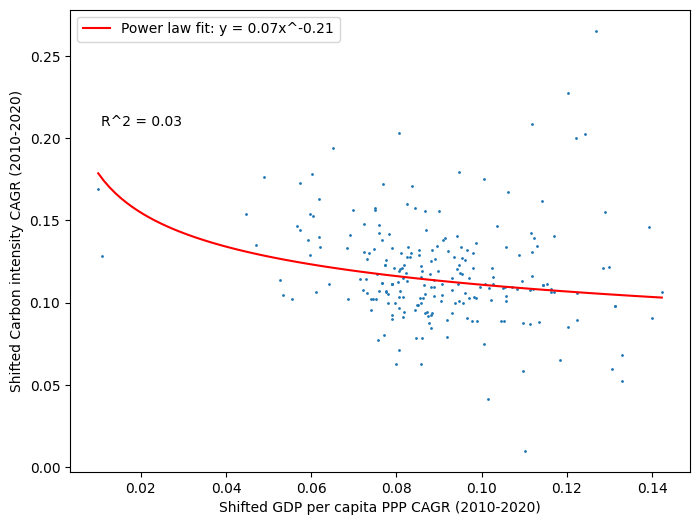

Elasticity of carbon intensity reduction with respect to GDP CAGR: -0.21


In [8]:
# Now fit a power law also

# ... [Your existing code ends here] ...

# Shift the data to make all values positive
min_gdp_cagr = np.abs(cleaned_cagr_df['gdp_pc_ppp_cagr'].min())
min_ci_cagr = np.abs(cleaned_cagr_df['carbon_intensity_cagr'].min())
cleaned_cagr_df['shifted_gdp_cagr'] = cleaned_cagr_df['gdp_pc_ppp_cagr'] + min_gdp_cagr + 0.01  # Avoid zero values
cleaned_cagr_df['shifted_ci_cagr'] = cleaned_cagr_df['carbon_intensity_cagr'] + min_ci_cagr + 0.01

# Log-transform the data
cleaned_cagr_df['log_gdp_cagr'] = np.log(cleaned_cagr_df['shifted_gdp_cagr'])
cleaned_cagr_df['log_ci_cagr'] = np.log(cleaned_cagr_df['shifted_ci_cagr'])

# Fit a linear model to the log-transformed data
coefficients, _ = np.polyfit(cleaned_cagr_df['log_gdp_cagr'], cleaned_cagr_df['log_ci_cagr'], 1, cov=True)

# The power law relationship: y = ax^b becomes linear when log-transformed: log(y) = log(a) + b*log(x)
a = np.exp(coefficients[1])  # Intercept is log(a), so a = exp(intercept)
b = coefficients[0]  # Slope is the exponent in the power law

# Create the power law function for plotting
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate x values for plotting the power law
x_values = np.linspace(cleaned_cagr_df['shifted_gdp_cagr'].min(), cleaned_cagr_df['shifted_gdp_cagr'].max(), 100)

# Plotting the power law model
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_cagr_df['shifted_gdp_cagr'], cleaned_cagr_df['shifted_ci_cagr'], s=1)
plt.plot(x_values, power_law(x_values, a, b), color='red', label=f'Power law fit: y = {a:.2f}x^{b:.2f}')
plt.xlabel('Shifted GDP per capita PPP CAGR (2010-2020)')
plt.ylabel('Shifted Carbon intensity CAGR (2010-2020)')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
# plot the R^2 value
plt.annotate(f'R^2 = {np.corrcoef(cleaned_cagr_df["shifted_gdp_cagr"], cleaned_cagr_df["shifted_ci_cagr"])[0][1]**2:.2f}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.show()

# Print the elasticity (exponent b in the power law)
print(f"Elasticity of carbon intensity reduction with respect to GDP CAGR: {b:.2f}")

### Replicate logarithmic model of gdp pc determining carbon intensity trend 2010 to 2020 from graph made

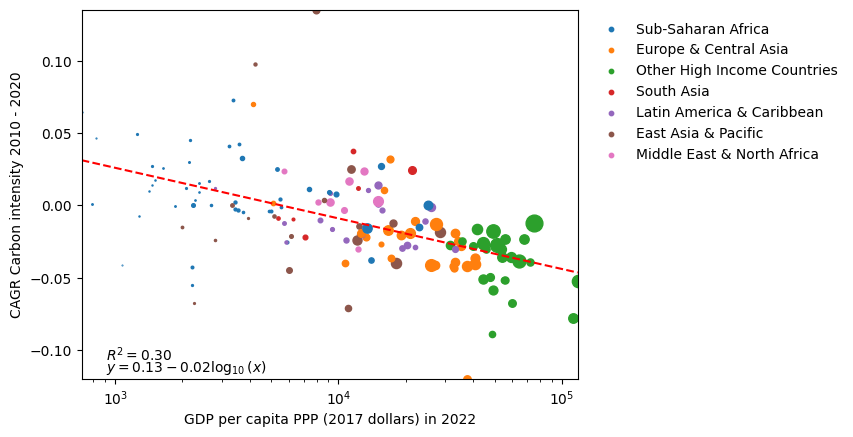

In [9]:
# plot from the dataframe data_nowcasted.extended.csv the column gdp_pc_ppp_2017 against the column carbon_intensity_trend but by looping over all countries
# Assuming 'data' is another DataFrame that contains 'country_code'
countries = data['country_code'].unique()  # Modify as per your actual DataFrame
# set up figure and ax for the plot
fig, ax = plt.subplots()
# make a list for the x and y values so we can fit a line later on
list_values_gdp = []
list_values_carbon_intensity = []
# create mapping between region and color based on regions in data dataframe so in the column region_name
region_color_mapping = {region: color for region, color in zip(data['region_name'].unique(), cm.tab10.colors)}
# make a set to keep track of which regions have appeared already in an earlier loop iteration
regions_appeared = set()
# loop over all countries and plot the gdp_pc_ppp_2017 against the carbon_intensity_trend
for country in countries:
    
    country_data = data[data['country_code'] == country]
    # make size of marker dependent on the carbon emissions per capita in 2022 from the columns gdp_pc_ppp_2017 and carbon_intensity which need to multiplied together
    size = country_data['gdp_pc_ppp_2017'] * country_data['carbon_intensity'] / (1e2*1.5)
    region = country_data['region_name'].values[0]
    color = region_color_mapping[country_data['region_name'].values[0]]
   
    # keep track of which region has appeared already in an earlier loop iteration with a set
    if region in regions_appeared:
        label = None
    else:
        label = region
        regions_appeared.add(region)
    
    # plot the scatter plot
    ax.scatter(country_data['gdp_pc_ppp_2017'], 
               country_data['carbon_intensity_trend'],
               s=size,
               color = color,
               label=label)

# label the axes
ax.set_xlabel('GDP per capita PPP (2017 dollars) in 2022')
ax.set_ylabel('CAGR Carbon intensity 2010 - 2020')
# plot a logarithmic fit line
coefficients = np.polyfit(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'], 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(np.log(data['gdp_pc_ppp_2017']).min(), np.log(data['gdp_pc_ppp_2017']).max(), 100)
y_axis = polynomial(x_axis)
ax.plot(np.exp(x_axis), y_axis, color='red', linestyle='--')
# Calculate and annotate the R^2 value
r_squared = np.corrcoef(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'])[0][1] ** 2
ax.annotate(r'$R^2 = {:.2f}$'.format(r_squared), xy=(0.05, 0.05), xycoords='axes fraction')
# Annotate the equation of the logarithmic fit line
ax.annotate(r'$y = {:.2f} - {:.2f}\log_{{10}}(x)$'.format(polynomial[0], abs(polynomial[1])), xy=(0.05, 0.02), xycoords='axes fraction')
lgnd = ax.legend(loc='upper right', bbox_to_anchor=(1.55, 1), frameon=False)
# Set a fixed marker size for all legend markers
for handle in lgnd.legend_handles:
    handle.set_sizes([10])  # Adjust the number inside the list to change the size
# log scale the x axis
ax.set_xscale('log')
ax.margins(0)
# save plot as high resolution png file
plt.savefig('./gdp_pc_vs_carbon_intensity_trend.png', dpi=300, bbox_inches='tight')

plt.show()

### another pattern we have to investigate is population growth as a function of gdp per capita
##### Murphy, Thomas W, Jr shows in https://escholarship.org/uc/item/9js5291m that net pop growth rate, without migration, negatively correlates with gdp per capita. replicate this and ascertain an elasticity

Country SSD has NaN values for one or both variables.
Fit line: y = -0.0190 * log10(x) + 0.0874
Elasticity of birth rate with respect to GDP per capita PPP: -0.25


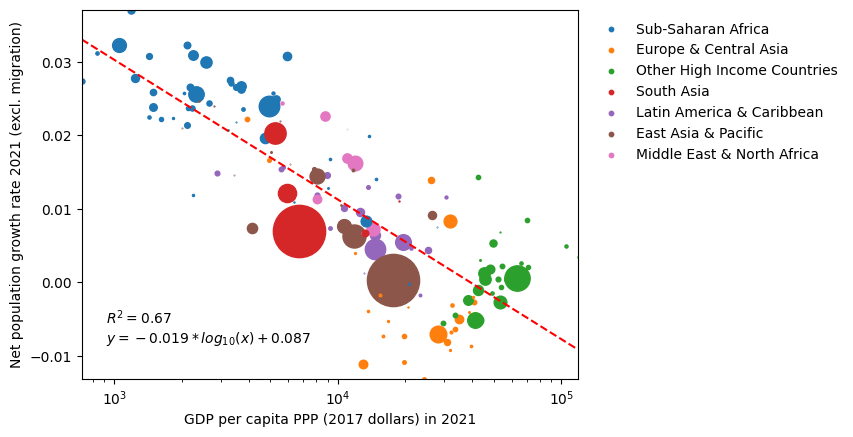

In [10]:
# import the csv file birth_and_death_rate.csv into a pandas dataframe
birth_and_death_rate = pd.read_csv('./data/pip_all_data/birth_and_death_rate.csv', sep=';')
# only use the country codes that are in the dataframe data_nowcasted_extended in the column country_code by make a list of the unique values in the column country_code
countries = data['country_code'].unique()
# make a list for the x and y values so we can fit a line later on
list_values_gdp = []
list_values_net = []
# create mapping between region and color based on regions in data dataframe so in the column region_name
region_color_mapping = {region: color for region, color in zip(data['region_name'].unique(), cm.tab10.colors)}
# make a set to keep track of which regions have appeared already in an earlier loop iteration
regions_appeared = set()
# define plot and axis on which all the scatter plots will be plotted
fig, ax = plt.subplots()
# loop over all countries
for country in countries:
    # Get the index for the current country in each DataFrame
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_bd = birth_and_death_rate[birth_and_death_rate['Country Code'] == country].index[0]
    #print(country_row_gdp, country_row_bd)

    # only plot for 2021
    gdp_pc_ppp_values = gdp_pc_ppp.at[country_row_gdp, '2021']
    net_values = birth_and_death_rate.at[country_row_bd, 'net']
    # check whether the values are not NaN
    if np.isnan(gdp_pc_ppp_values) or np.isnan(net_values):
        print(f"Country {country} has NaN values for one or both variables.")
        continue # The continue statement skips the current iteration of the loop and the control flow of the program goes to the next iteration.

    # find region of the country in the data dataframe
    region = data[data['country_code'] == country]['region_name'].values[0]
    
    # keep track of which region has appeared already in an earlier loop iteration with a set
    if region in regions_appeared:
        label = None
    else:
        label = region
        regions_appeared.add(region)

    size = data[data['country_code'] == country]['population'].values[0] / 1e6  # Population size in millions
    # Plot the data and set color according to region in data dataframe and determine size of the points according to population size in the dataframe data column population
    ax.scatter(gdp_pc_ppp_values, net_values, s=size, color=region_color_mapping[region], label=label)

    # label the axes
    ax.set_xlabel('GDP per capita PPP (2017 dollars) in 2021')
    ax.set_ylabel('Net population growth rate 2021 (excl. migration)')
    # log the x axis
    ax.set_xscale('log')
    # no margins
    ax.margins(0)

    # save all the countries in a list for x and y values so we can plot a fit line later on outside the loop together with the country code as a tuple
    list_values_gdp.append(gdp_pc_ppp_values)
    list_values_net.append(net_values)


if len(list_values_gdp) > 1:  # Ensure there's more than one data point
    try:
       # Fit a simple linear fit line to the log10 of the data
        coefficients = np.polyfit(np.log10(list_values_gdp), list_values_net, 1)
        # Create a polynomial object with the coefficients
        linear_fit_function = np.poly1d(coefficients)
        
        # Print the coefficients of the fit line with 4 decimal places
        print(f"Fit line: y = {coefficients[0]:.4f} * log10(x) + {coefficients[1]:.4f}")
        
        # Generate x values for plotting the fit line
        log_x_values = np.linspace(np.log10(min(list_values_gdp)), np.log10(max(list_values_gdp)), 100)
        y_values_fit = linear_fit_function(log_x_values)
        
        # Plot the fit line
        ax.plot(10**log_x_values, y_values_fit, color='red', linestyle='--')  # Convert log_x_values back to original scale
        
        # Calculate and plot the R^2 value
        correlation_matrix = np.corrcoef(np.log10(list_values_gdp), list_values_net)
        r_squared = correlation_matrix[0, 1] ** 2
        ax.annotate(r'$R^2 = {:.2f}$'.format(r_squared), xy=(0.05, 0.15), xycoords='axes fraction')
        
        # Annotate the equation of the linear fit line
        ax.annotate(r'$y = {0:.3f} * log_{{10}}(x) + {1:.3f}$'.format(coefficients[0], coefficients[1]), xy=(0.05, 0.1), xycoords='axes fraction')
        
        # Modify legend handling as required (no changes needed here from your original code)
        lgnd = ax.legend(loc='upper right', bbox_to_anchor=(1.55, 1), frameon=False)
        for handle in lgnd.legend_handles:
            handle.set_sizes([10])

    except np.linalg.LinAlgError:
        print("Error: SVD did not converge. Check your data for issues.")
else:
    print("Insufficient valid data points for fitting.")
    

# compute an elasticity of birth rate with respect to GDP per capita PPP
# Shift the data to make all values positive
min_net = np.abs(min(list_values_net))
# Avoid zero values
shifted_net = np.array(list_values_net) + min_net + 0.01
# now compute the elasticity via log log regression, the coefficient is the elasticity
coefficients = np.polyfit(np.log(list_values_gdp), np.log(shifted_net), 1)

# Print the elasticity which is the coefficient multiplication factor of the log log regression
print(f"Elasticity of birth rate with respect to GDP per capita PPP: {coefficients[0]:.2f}")

# save plot as high resolution png file
plt.savefig('./data/pip_all_data/gdp_per_capita_ppp_vs_net_population_growth_rate.png', dpi=300, bbox_inches='tight')


### Plot both the graphs together above as panels A and B of the same plot

Country SSD has NaN values for one or both variables.


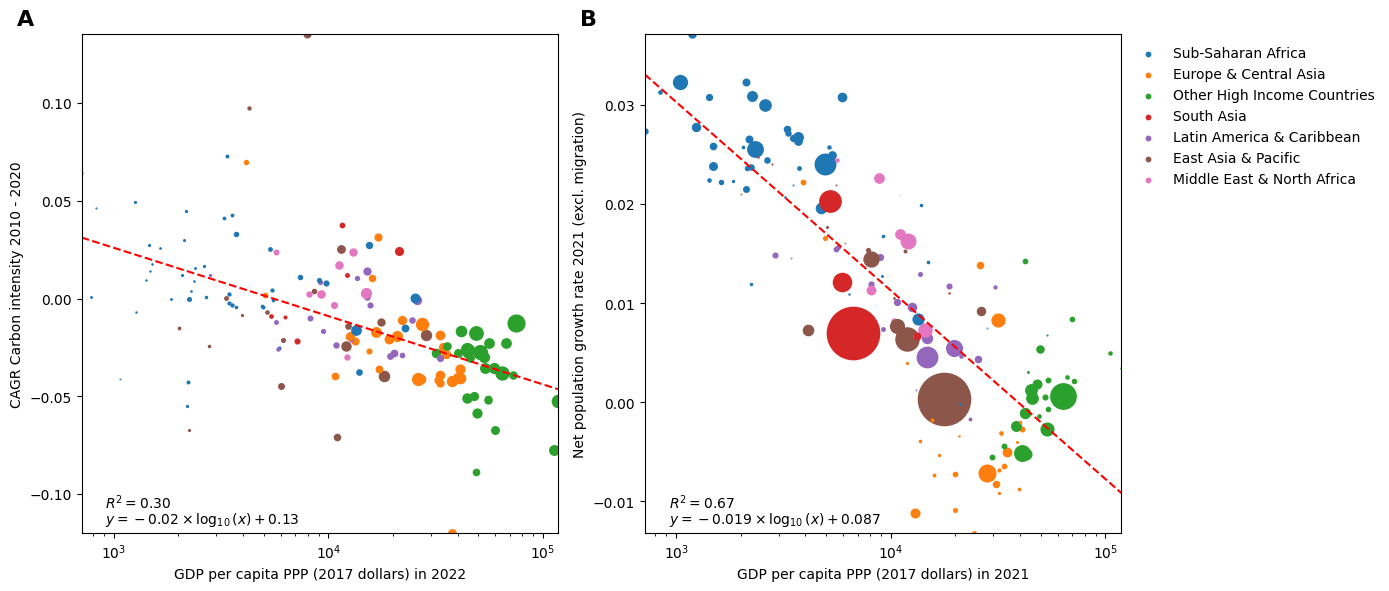

In [11]:
### Plot both the graphs together above as panels A and B of the same plot

# Assuming necessary imports, data preparation, and variables like `countries`, `data`, `gdp_pc_ppp`, `birth_and_death_rate`, `region_color_mapping`, etc., are defined above.

# Set up figure for the plots
fig = plt.figure(figsize=(14, 6))

# Create two subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

regions_appeared = set()

# Plot 1: Scatter plot of GDP per capita PPP against carbon intensity trend
for country in countries:
    country_data = data[data['country_code'] == country]
    size = country_data['gdp_pc_ppp_2017'] * country_data['carbon_intensity'] / (1e2*1.5)
    region = country_data['region_name'].values[0]
    color = region_color_mapping[region]
    if region in regions_appeared:
        label = None
    else:
        label = region
        regions_appeared.add(region)
    ax1.scatter(country_data['gdp_pc_ppp_2017'], 
                country_data['carbon_intensity_trend'],
                s=size,
                color=color,
                label=label)

# Configurations for Plot 1
ax1.set_xlabel('GDP per capita PPP (2017 dollars) in 2022')
ax1.set_ylabel('CAGR Carbon intensity 2010 - 2020')
ax1.set_xscale('log')
ax1.margins(0)

# Plot a logarithmic fit line for the first plot
coefficients = np.polyfit(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'], 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(np.log(data['gdp_pc_ppp_2017']).min(), np.log(data['gdp_pc_ppp_2017']).max(), 100)
y_axis = polynomial(x_axis)
ax1.plot(np.exp(x_axis), y_axis, color='red', linestyle='--')

# Calculate and annotate the R^2 value for the first plot
r_squared = np.corrcoef(np.log(data['gdp_pc_ppp_2017']), data['carbon_intensity_trend'])[0][1] ** 2
ax1.annotate(r'$R^2 = {:.2f}$'.format(r_squared), xy=(0.05, 0.05), xycoords='axes fraction')

# Annotate the equation of the logarithmic fit line for the first plot
ax1.annotate(r'$y = {:.2f} \times \log_{{10}}(x) + {:.2f}$'.format(coefficients[0], coefficients[1]), xy=(0.05, 0.02), xycoords='axes fraction')

# Labeling Panel A
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

regions_appeared.clear()  # Reset for the second plot
list_values_gdp = []
list_values_net = []

# Plot 2: Scatter plot of GDP per capita PPP against net population growth rate
for country in countries:
    country_row_gdp = gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country].index[0]
    country_row_bd = birth_and_death_rate[birth_and_death_rate['Country Code'] == country].index[0]
    gdp_pc_ppp_values = gdp_pc_ppp.at[country_row_gdp, '2021']
    net_values = birth_and_death_rate.at[country_row_bd, 'net']
    if np.isnan(gdp_pc_ppp_values) or np.isnan(net_values):
        print(f"Country {country} has NaN values for one or both variables.")
        continue
    region = data[data['country_code'] == country]['region_name'].values[0]
    size = data[data['country_code'] == country]['population'].values[0] / 1e6  # Population size in millions
    color = region_color_mapping[region]
    label = region if region not in regions_appeared else None
    regions_appeared.add(region)  # Ensure each region is added once
    ax2.scatter(gdp_pc_ppp_values, net_values, s=size, color=color, label=label)
    list_values_gdp.append(gdp_pc_ppp_values)
    list_values_net.append(net_values)

# Configurations for Plot 2
ax2.set_xlabel('GDP per capita PPP (2017 dollars) in 2021')
ax2.set_ylabel('Net population growth rate 2021 (excl. migration)')
ax2.set_xscale('log')
ax2.margins(0)

# Fit a simple linear fit line to the log10 of the data for the second plot
coefficients = np.polyfit(np.log10(list_values_gdp), list_values_net, 1)
linear_fit_function = np.poly1d(coefficients)
log_x_values = np.linspace(np.log10(min(list_values_gdp)), np.log10(max(list_values_gdp)), 100)
y_values_fit = linear_fit_function(log_x_values)
ax2.plot(10**log_x_values, y_values_fit, color='red', linestyle='--')

# Calculate and plot the R^2 value for the second plot, positioned in the left lower corner
correlation_matrix = np.corrcoef(np.log10(list_values_gdp), list_values_net)
r_squared = correlation_matrix[0, 1] ** 2
ax2.annotate(r'$R^2 = {:.2f}$'.format(r_squared), xy=(0.05, 0.05), xycoords='axes fraction')

# Annotate the equation of the linear fit line for the second plot, also in the left lower corner
ax2.annotate(r'$y = {:.3f} \times \log_{{10}}(x) + {:.3f}$'.format(coefficients[0], coefficients[1]), xy=(0.05, 0.02), xycoords='axes fraction')

# Labeling Panel B in the upper left corner
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')


# Modify legend handling for the second plot to place it outside
lgnd = ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
for handle in lgnd.legend_handles:
    handle.set_sizes([10])

plt.tight_layout()

# Save plot as high-resolution PNG file
plt.savefig('fig1.png', dpi=300, bbox_inches='tight')
plt.show()


## Plot radical convergence compared to SSPs

(0.05, 0.05)
80000.05
0.22000000000000003
(0.05, 0.05)
60000.05
0.25
(5000, -0.05)
25000
0.29000000000000004
(5000, -0.05)
45000
0.49000000000000005
(0.05, 0.05)
100000.05
0.27
(10000, 0.07)
65000
0.07
(12000, 0.05)
39500
0.05
(15000, -0.05)
32500
0.47500000000000003


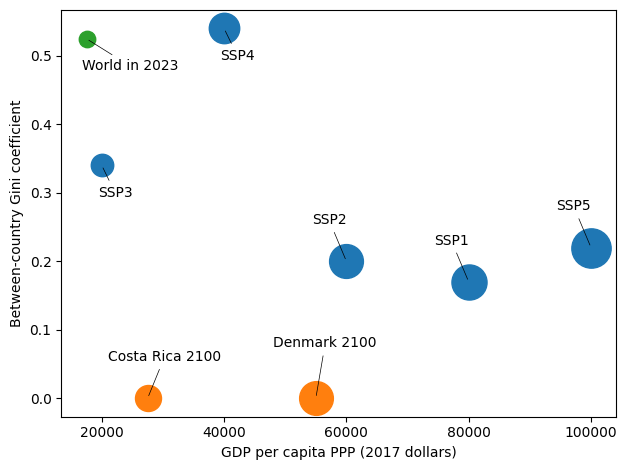

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Import the data
scenario_classification_inequality = pd.read_csv('./data/scenario_classification_inequality.csv', sep=';')

# Predefined label positions for each scenario
label_positions = {
    'SSP1': (0.05, 0.05),
    'SSP2': (0.05, 0.05),
    'SSP3': (5000, -0.05),
    'SSP4': (5000, -0.05),
    'SSP5': (0.05, 0.05),
    'Denmark 2100': (10000, 0.07),
    'Costa Rica 2100': (12000, 0.05),
    'World in 2023': (15000, -0.05)

}

fig, ax = plt.subplots()
category_color_mapping = {category: color for category, color in zip(scenario_classification_inequality['category'].unique(), cm.tab10.colors)}
categories_appeared = set()

for scenario in scenario_classification_inequality['scenario_name'].unique():
    scenario_data = scenario_classification_inequality[scenario_classification_inequality['scenario_name'] == scenario]
    category = scenario_data['category'].values[0]
    
    if category in categories_appeared:
        label = None
    else:
        label = category
        categories_appeared.add(category)

    size = scenario_data['total_gdp'] / 1e12  # Adjust size for visibility if necessary
    
    # Plot each scenario
    scatter = ax.scatter(scenario_data['GDPpc'], 
                         scenario_data['between_country_gini'],
                         s=size,
                         color=category_color_mapping[category],
                         label=label)
    
    # Manually set the position of the text for each scenario using predefined offsets
    for i, txt in enumerate(scenario_data['scenario_name']):
        offset = label_positions.get(txt)  # Use predefined offset or default
        print(offset)
        x_position = scenario_data['GDPpc'].values[i] + offset[0]
        print(x_position)
        y_position = scenario_data['between_country_gini'].values[i] + offset[1]
        print(y_position)
        
        # Draw line from marker to text
        ax.annotate(txt, 
                    xy=(scenario_data['GDPpc'].values[i], scenario_data['between_country_gini'].values[i]), 
                    xytext=(x_position, y_position),
                    textcoords="data",
                    ha='right', 
                    va='bottom',
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Label the axes
ax.set_xlabel('GDP per capita PPP (2017 dollars)')
ax.set_ylabel('Between-country Gini coefficient')
plt.tight_layout()
plt.show()